<h1>Detecção de vazamentos através de dados de vibração do encanamento</h>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Leitura dos dados</h2>
<p>O dataset consiste de 18 atributos, que são 6 medidas estatísticas do espectro de vibração para cada eixo, e a classe, que pode assumir o valor -1 para "não vazamento" e 1 para "vazamento". Ao todo são 800 amostras, sendo 400 para cada classe.</p>

In [109]:
df = pd.read_csv('dados.csv', names=['median_x','var_x','std_x','skewness_x','kurtosis_x','rms_x'
                                     ,'median_y','var_y','std_y','skewness_y','kurtosis_y','rms_y'
                                     ,'median_z','var_z','std_z','skewness_z','kurtosis_z','rms_z','class'])

In [110]:
df.head()

,median_x,var_x,std_x,skewness_x,kurtosis_x,rms_x,median_y,var_y,std_y,skewness_y,kurtosis_y,rms_y,median_z,var_z,std_z,skewness_z,kurtosis_z,rms_z,class
0,0.10568,0.014031,0.11845,2.2839,10.769,0.18880,0.095687,0.017293,0.13150,4.1533,39.959,0.19511,0.18652,0.59581,0.77188,19.098,426.97,0.83706,-1
1,0.10040,0.016987,0.13033,4.7902,51.139,0.19405,0.091081,0.019032,0.13795,3.3503,25.458,0.20127,0.18234,0.44517,0.66721,18.651,416.79,0.73552,-1
2,0.10464,0.015013,0.12253,2.8647,19.107,0.19165,0.098904,0.019470,0.13954,3.1034,21.920,0.20616,0.18854,0.53343,0.73036,18.870,421.23,0.79753,-1
3,0.10585,0.021163,0.14547,3.7655,29.143,0.21229,0.097027,0.015140,0.12305,4.3058,43.182,0.18629,0.18107,0.58460,0.76459,18.814,419.82,0.82883,-1
4,0.10752,0.015175,0.12319,2.5569,13.457,0.19518,0.101200,0.018423,0.13573,5.5079,66.071,0.19759,0.18643,0.51652,0.71869,18.302,401.93,0.78812,-1


<h3>O valor da classe -1 é alterado para 0 por questão de interpretabilidade.</h3>

In [111]:
df['class'].unique()

array([-1,  1], dtype=int64)

In [112]:
df['class'] = df['class'].apply(lambda x : 0 if x == -1 else 1)

In [113]:
df['class'].unique()

array([0, 1], dtype=int64)

<h2>Análise exploratória dos dados</h2>
<p>Analisando os pair plots abaixo, é possível notar que os atributos relacionados ao eixo z são responsáveis por gerar a maior separabilidade entre as classes.</p>

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
median_x      800 non-null float64
var_x         800 non-null float64
std_x         800 non-null float64
skewness_x    800 non-null float64
kurtosis_x    800 non-null float64
rms_x         800 non-null float64
median_y      800 non-null float64
var_y         800 non-null float64
std_y         800 non-null float64
skewness_y    800 non-null float64
kurtosis_y    800 non-null float64
rms_y         800 non-null float64
median_z      800 non-null float64
var_z         800 non-null float64
std_z         800 non-null float64
skewness_z    800 non-null float64
kurtosis_z    800 non-null float64
rms_z         800 non-null float64
class         800 non-null int64
dtypes: float64(18), int64(1)
memory usage: 118.8 KB


In [117]:
df.describe()

,median_x,var_x,std_x,skewness_x,kurtosis_x,rms_x,median_y,var_y,std_y,skewness_y,kurtosis_y,rms_y,median_z,var_z,std_z,skewness_z,kurtosis_z,rms_z,class
count,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.108760,0.017265,0.130750,3.524394,31.95119,0.201816,0.110326,0.017880,0.132992,3.60568,31.188726,0.204799,0.217697,15.412505,3.306933,21.028838,488.595828,3.348911,0.500000
std,0.010665,0.003544,0.013018,1.880775,33.81780,0.014582,0.011563,0.003835,0.013910,1.41653,25.303739,0.010448,0.018722,15.340598,2.117147,3.290507,88.679593,2.100766,0.500313
min,0.089417,0.011280,0.106210,1.606800,4.95020,0.173220,0.088563,0.010190,0.100950,1.65640,5.728800,0.179660,0.168310,0.048200,0.219550,1.891700,6.502000,0.342170,0.000000
25%,0.100395,0.014738,0.121402,2.086000,7.76280,0.191097,0.099882,0.015046,0.122665,2.44925,11.827750,0.197247,0.206547,1.527125,1.235800,21.058000,486.815000,1.288350,0.000000
50%,0.104960,0.016425,0.128155,2.485350,11.73850,0.198430,0.107970,0.017161,0.131000,3.24190,22.980500,0.203725,0.217490,10.733100,3.272700,22.242000,523.345000,3.303850,0.500000
75%,0.119220,0.018981,0.137767,4.782850,49.97700,0.212398,0.121370,0.019978,0.141343,4.39465,42.963250,0.210930,0.228030,25.382750,5.019250,22.363000,527.220000,5.046925,1.000000
max,0.136890,0.032671,0.180750,10.013000,164.30000,0.246750,0.133930,0.037918,0.194730,9.98690,171.090000,0.251310,0.272780,43.629000,6.605200,22.457000,531.400000,6.632100,1.000000


In [118]:
df.drop('class',axis=1).corr()

,median_x,var_x,std_x,skewness_x,kurtosis_x,rms_x,median_y,var_y,std_y,skewness_y,kurtosis_y,rms_y,median_z,var_z,std_z,skewness_z,kurtosis_z,rms_z
median_x,1.000000,0.626415,0.630586,0.778611,0.750211,0.808192,-0.707140,0.264060,0.281301,0.068769,0.047167,-0.096352,0.139603,-0.333701,-0.289611,-0.019454,-0.028392,-0.290125
var_x,0.626415,1.000000,0.998053,0.861181,0.846624,0.953087,-0.582061,0.275786,0.285922,0.143830,0.137669,-0.026617,-0.027560,-0.279021,-0.246235,-0.095106,-0.099368,-0.246509
std_x,0.630586,0.998053,1.000000,0.855567,0.837143,0.957719,-0.588022,0.284815,0.295136,0.150208,0.143425,-0.019732,-0.030113,-0.279670,-0.247373,-0.100662,-0.104927,-0.247614
skewness_x,0.778611,0.861181,0.855567,1.000000,0.993519,0.864870,-0.723182,0.312466,0.325890,0.137968,0.126403,-0.062692,-0.017205,-0.358048,-0.312616,-0.088673,-0.096494,-0.313106
kurtosis_x,0.750211,0.846624,0.837143,0.993519,1.000000,0.840606,-0.681804,0.274347,0.287251,0.109616,0.099440,-0.080525,0.002540,-0.333906,-0.288481,-0.063852,-0.071223,-0.289032
rms_x,0.808192,0.953087,0.957719,0.864870,0.840606,1.000000,-0.654704,0.287549,0.301087,0.125732,0.113190,-0.048902,0.053275,-0.299995,-0.261752,-0.064588,-0.070413,-0.262102
median_y,-0.707140,-0.582061,-0.588022,-0.723182,-0.681804,-0.654704,1.000000,-0.419293,-0.434199,-0.241219,-0.222921,0.118376,0.343623,0.587764,0.533371,0.281846,0.297006,0.533697
var_y,0.264060,0.275786,0.284815,0.312466,0.274347,0.287549,-0.419293,1.000000,0.997352,0.837093,0.814349,0.835642,-0.313504,-0.368800,-0.360956,-0.201851,-0.210848,-0.361129
std_y,0.281301,0.285922,0.295136,0.325890,0.287251,0.301087,-0.434199,0.997352,1.000000,0.829765,0.801057,0.830290,-0.316978,-0.377562,-0.368416,-0.206812,-0.215990,-0.368587
skewness_y,0.068769,0.143830,0.150208,0.137968,0.109616,0.125732,-0.241219,0.837093,0.829765,1.000000,0.991455,0.692404,-0.318882,-0.286295,-0.291399,-0.173037,-0.179868,-0.291552


In [115]:
df.columns

Index(['median_x', 'var_x', 'std_x', 'skewness_x', 'kurtosis_x', 'rms_x',
       'median_y', 'var_y', 'std_y', 'skewness_y', 'kurtosis_y', 'rms_y',
       'median_z', 'var_z', 'std_z', 'skewness_z', 'kurtosis_z', 'rms_z',
       'class'],
      dtype='object')

<h3>Pair plot dos atributos do eixo X</h3>

C:\Users\marki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


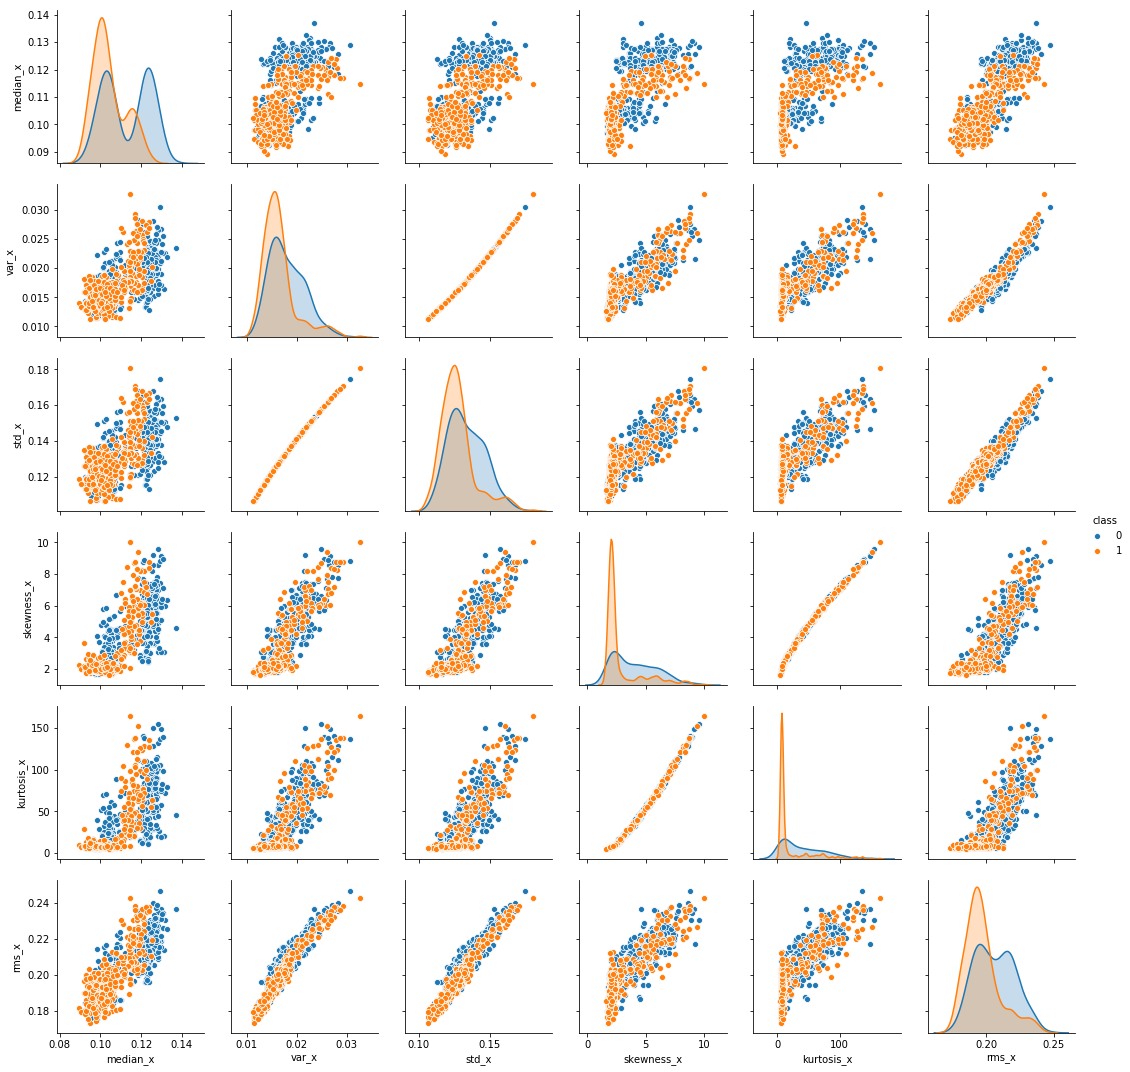

In [116]:
sns.pairplot(df, hue='class', vars=('median_x', 'var_x', 'std_x', 'skewness_x', 'kurtosis_x', 'rms_x'))

<h3>Pair plot dos atributos do eixo Y</h3>

C:\Users\marki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


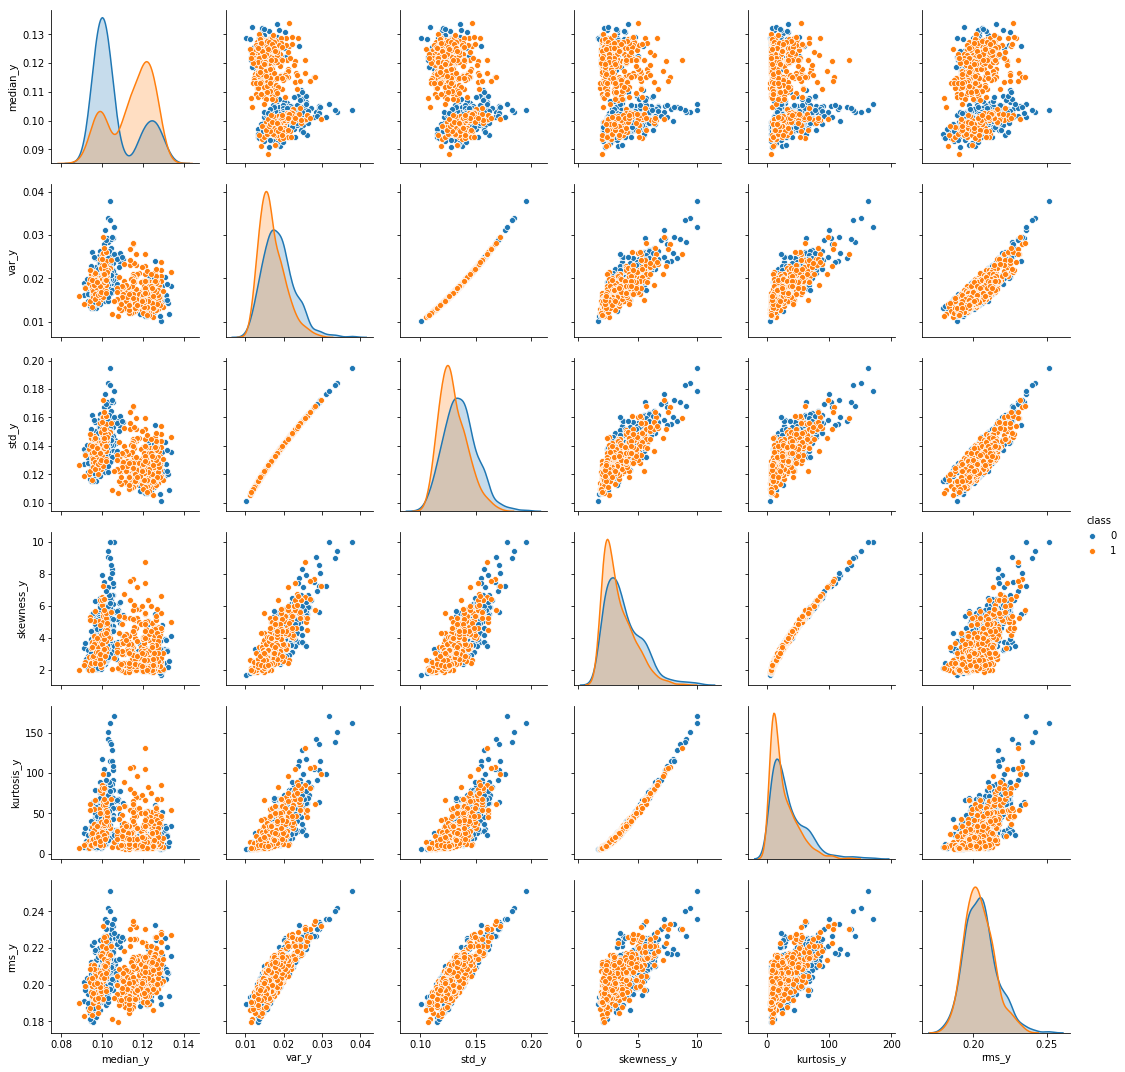

In [119]:
sns.pairplot(df, hue='class', vars=('median_y', 'var_y', 'std_y', 'skewness_y', 'kurtosis_y', 'rms_y'))

<h3>Pair plot dos atributos do eixo Z</h3>

C:\Users\marki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


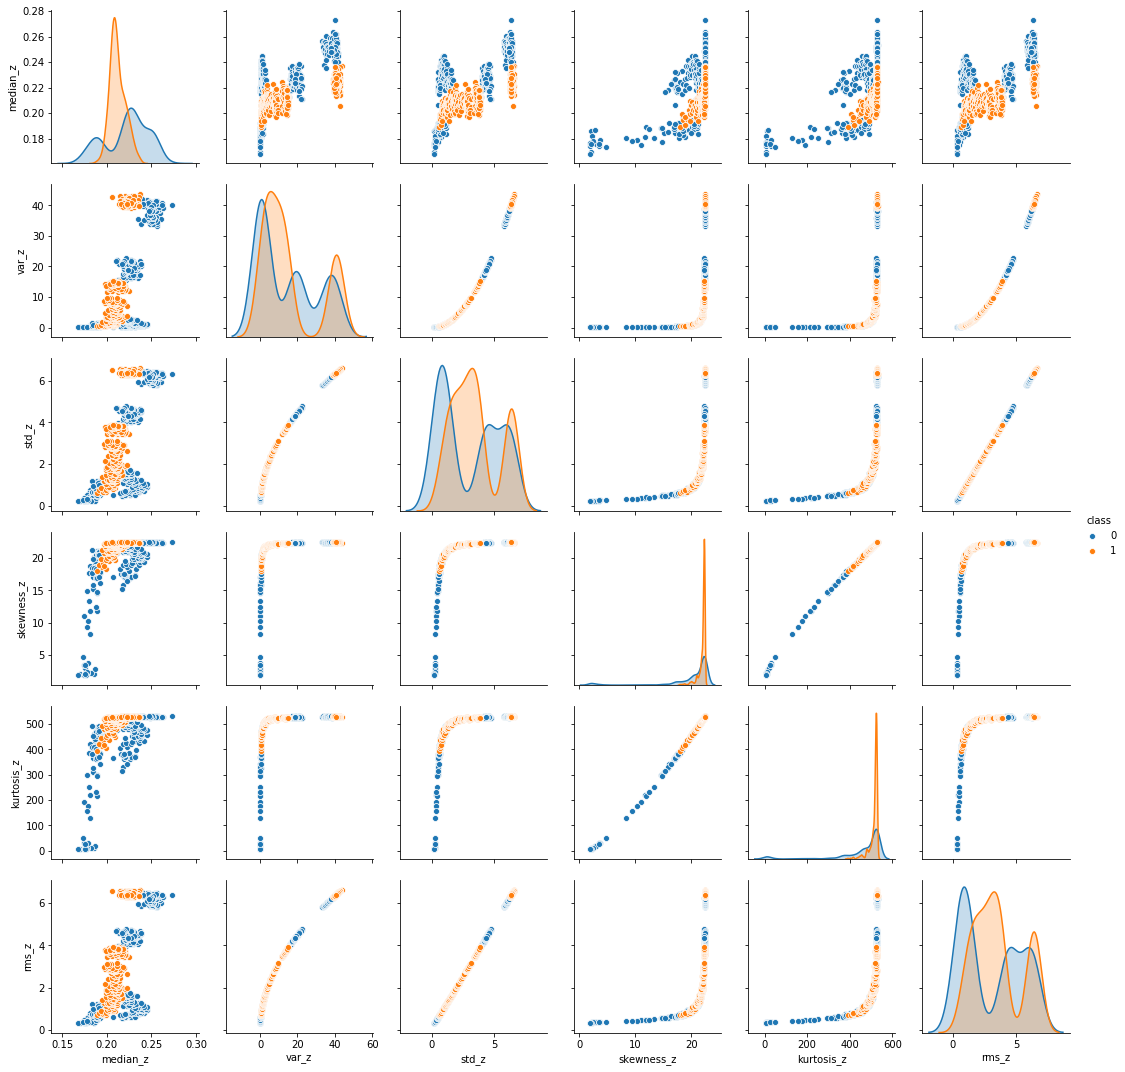

In [108]:
sns.pairplot(df, hue='class', vars=('median_z', 'var_z', 'std_z', 'skewness_z', 'kurtosis_z', 'rms_z'))

<h2>Classificação</h2>

<h3>Primeiro modelo: Random Forest com todos atributos</h3>

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<p>Separação dos dados para treino e teste e feature scaling, que embora não seja necessário para o Random Forest, será para o modelo com Logistic Regression.</p>

In [54]:
X = df.drop('class',axis=1)
y = df['class']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
stdSc = StandardScaler()

In [61]:
scld_train = stdSc.fit_transform(X_train)

In [122]:
scld_test = stdSc.transform(X_test)

<p>Modelo</p>

In [64]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(scld_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
pred = rfc.predict(scld_test)

In [66]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        85
          1       1.00      1.00      1.00        75

avg / total       1.00      1.00      1.00       160



<h3>Segundo modelo: Logistic Regression com todos atributos</h3>

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()

In [75]:
lr.fit(scld_train, y_train)
pred2 = lr.predict(scld_test)

In [124]:
print(classification_report(y_test, pred2))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        85
          1       0.93      0.93      0.93        75

avg / total       0.94      0.94      0.94       160



<h3>Terceiro modelo: Random Forest com os atributos do eixo z</h3>

In [81]:
scld_train.shape

(640, 18)

In [84]:
#6 últimos atributos
train_z = scld_train[:, -6:]
train_z.shape

(640, 6)

In [85]:
test_z = scld_test[:, -6:]

In [86]:
rfc2 = RandomForestClassifier(n_estimators=300)
rfc2.fit(train_z, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
pred3 = rfc2.predict(test_z)

In [89]:
print(classification_report(y_test, pred3))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98        85
          1       0.97      0.99      0.98        75

avg / total       0.98      0.98      0.98       160



In [125]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred3))

[[83  2]
 [ 1 74]]


<h3>Quarto modelo: Random Forest com os atributos do eixo x, para comparação com o anterior</h3>

In [91]:
#6 primeiros atributos
train_x = scld_train[:, :6]
train_x.shape

(640, 6)

In [99]:
test_x = scld_test[:, :6 ]

In [95]:
rfc3 = RandomForestClassifier(n_estimators=300)
rfc3.fit(train_x, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
pred4 = rfc3.predict(test_x)

In [101]:
print(classification_report(y_test, pred4))

             precision    recall  f1-score   support

          0       0.87      0.68      0.76        85
          1       0.71      0.88      0.79        75

avg / total       0.79      0.78      0.77       160



<h2>Conclusão</h2>

<p>O modelo ideal para esse problema deve ter o menor número de falsos negativos possível, pois é crucial que caso haja vazamento ele seja detectado pelo sistema. Outra questão relevante é quanto ao tempo para se realizar a medição, pois cada eixo de aceleração consumiria 1/3 do tempo, aproximadamente 60s neste caso, para processar os dados provenientes do acelerômetro que servem de entrada para o modelo. Em algumas situações, como por exemplo em tubulações de gás, 40s de diferença entre coletar informações dos 3 eixos ou de apenas 1 para detectar um possível vazamento pode ser determinante para se evitarem maiores problemas.</p>

<p>Com isso em mente e analisando a performance dos modelos, o primeiro utilizando Random Forest e todos os atributos se saiu melhor. A Logistic Regression, que é um modelo mais simples dependente de separabilidade linear, teve um bom desempenho mas não o suficiente para o problema em questão, embora que não se tenha realizado Hyperparameter Tuning. Utilizando Random Forest com os atributos apenas do eixo z pôde-se obter um desempenho próximo ao primeiro, com apenas um falso negativo, portanto a escolha entre os dois dependeria de se pesar a necessidade de baixo tempo de resposta com a de alta acurácia. O último modelo foi utilizado somente para demonstração de que o eixo z realmente continha a maioria das informações úteis para classificação, visto que esse utilizando apenas os atributos do eixo x obteve uma performance bem abaixo dos demais.</p>